In [37]:
# step 1: read and understand the data 
# step 2 : clean the data 
# step 3 : prepare the data for modelling 
# step 4 : modelling 
# step 5 : final analysis and business recommendation 

In [75]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [39]:
retail_df=pd.read_excel("Online Retail.xlsx")

In [40]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [41]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [42]:
# step2: clean the data 

In [43]:
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [44]:
# drop all the rows having missing values 
retail_df=retail_df.dropna()
retail_df.shape

(406829, 8)

In [45]:
# R (recency) : number of days since the last puchase 
# F (frequency) : number of transactions 
# M (monetary) : total revenue of the transaction 

In [46]:
retail_df['amount']=retail_df['Quantity']*retail_df['UnitPrice']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [47]:
grouped_df=retail_df.groupby('CustomerID')['amount'].sum().reset_index()
grouped_df.columns=['CustomerID','amount']
grouped_df.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [48]:
frequency=retail_df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
frequency.columns=['CustomerID','frequency']
frequency.head()

,CustomerID,frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [49]:
grouped_df=pd.merge(grouped_df,frequency,on='CustomerID',how='inner')
grouped_df.reset_index()

,index,CustomerID,amount,frequency
0,0,12346.0,0.00,2
1,1,12347.0,4310.00,182
2,2,12348.0,1797.24,31
3,3,12349.0,1757.55,73
4,4,12350.0,334.40,17
...,...,...,...,...
4367,4367,18280.0,180.60,10
4368,4368,18281.0,80.82,7
4369,4369,18282.0,176.60,13
4370,4370,18283.0,2094.88,756


In [50]:
# Recency 
# convert to datetime 
retail_df['InvoiceDate']=pd.to_datetime(retail_df['InvoiceDate'],format='%d-%m-%Y %H-%M')

In [51]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [52]:
max_date=max(retail_df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [53]:
retail_df['diff']=max_date-retail_df['InvoiceDate']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [54]:
last_purchase=retail_df.groupby('CustomerID')['diff'].min().reset_index()  # gives the recent purchase 
last_purchase.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [55]:
grouped_df=pd.merge(grouped_df,last_purchase,on='CustomerID',how='inner')
grouped_df.columns=['CustomerID','amount','frequency','recency']
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [56]:
grouped_df['recency']=grouped_df['recency'].dt.days
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


{'whiskers': [<matplotlib.lines.Line2D at 0x1fe240aa180>,
 'caps': [<matplotlib.lines.Line2D at 0x1fe170321b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fe206d8830>],
 'medians': [<matplotlib.lines.Line2D at 0x1fe197a33e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fe197a0980>],
 'means': []}

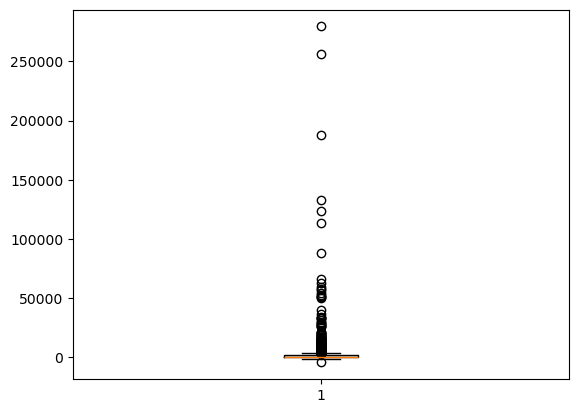

In [57]:
plt.boxplot(grouped_df['amount'])

In [58]:
# outliers 
# 1.statistical - anything outside of 98 or 95 percentile is an outlier 
# 2.domain specific 
# removing statistical outliers 
Q1=grouped_df.amount.quantile(0.05)
Q3=grouped_df.amount.quantile(0.95)
IQR=Q3-Q1
grouped_df=grouped_df[(grouped_df.amount>=Q1-1.5*IQR) & (grouped_df.amount<=Q3+1.5*IQR)]
# removing for frequency 
Q1=grouped_df.frequency.quantile(0.05)
Q3=grouped_df.frequency.quantile(0.95)
IQR=Q3-Q1
grouped_df=grouped_df[(grouped_df.frequency>=Q1-1.5*IQR) & (grouped_df.frequency<=Q3+1.5*IQR)]
# removing for recency
Q1=grouped_df.recency.quantile(0.05)
Q3=grouped_df.recency.quantile(0.95)
IQR=Q3-Q1
grouped_df=grouped_df[(grouped_df.recency>=Q1-1.5*IQR) & (grouped_df.recency<=Q3+1.5*IQR)]

In [59]:
# rescaling 
rfm_df=grouped_df[['amount','frequency','recency']]
rfm_df.head()

,amount,frequency,recency
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309


In [60]:
#  initiate the scaler 
scaler=StandardScaler()
# fit and transform 
rfm_df_scaled=scaler.fit_transform(rfm_df)   # it will converts into an numpy array 
rfm_df_scaled.shape

(4293, 3)

In [61]:
# conversion of numpy array to pandas 
rfm_df_scaled=pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns=['amount','frequency','recency']
rfm_df_scaled.head()

,amount,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [62]:
# modelling 
#  k-means with some arbitary k 
kmeans = KMeans(n_clusters=4,max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [63]:
kmeans.labels_

array([0, 1, 3, ..., 0, 3, 3])

In [64]:
# finding the optimal number of clusters 
# elbow curve/ssd's =sum of square distances 

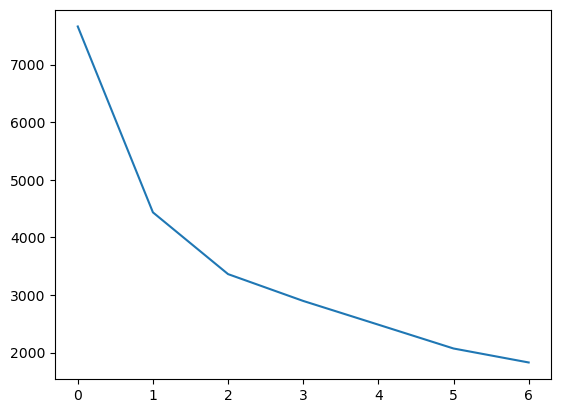

In [65]:
ssd=[]
range_n_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(rfm_df_scaled)
    ssd.append(kmeans.inertia_)
plt.plot(ssd)
#[0-6=2-8]

In [66]:
# Silhouette Analysis = p-q/(max(p,q))
 

# p is the mean distance to the points in the nearest cluster that the data point is not a part of

# q is the mean intra-cluster distance to all the points in its own cluster.

# The value of the silhouette score range lies between -1 to 1.

# A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

# A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [67]:
# data point num 10 (cluster 1)
# p=90,q=10,90/10=0.9
# data point num 15 (cluster 1)
# p=10,q=12,-2/12=-0.18

In [68]:
range_n_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(rfm_df_scaled)
    cluster_labels=kmeans.labels_
    silhouette_avg=silhouette_score(rfm_df_scaled,cluster_labels)
    print("for n_clusters={0}, the silhouette score is {1}".format(num_clusters,silhouette_avg))

for n_clusters=2, the silhouette score is 0.5389790406760827
for n_clusters=3, the silhouette score is 0.5085084004374336
for n_clusters=4, the silhouette score is 0.48506020563508856
for n_clusters=5, the silhouette score is 0.4661039652972969
for n_clusters=6, the silhouette score is 0.41773142554966397
for n_clusters=7, the silhouette score is 0.41401563261747404
for n_clusters=8, the silhouette score is 0.40308510195975183


In [69]:
# final model with k=3
kmeans=KMeans(n_clusters=3,max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [70]:
kmeans.labels_

array([1, 2, 0, ..., 1, 0, 0])

In [71]:
# assign the label 
grouped_df['cluster_id']=kmeans.labels_
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,2
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1


<Axes: xlabel='cluster_id', ylabel='amount'>

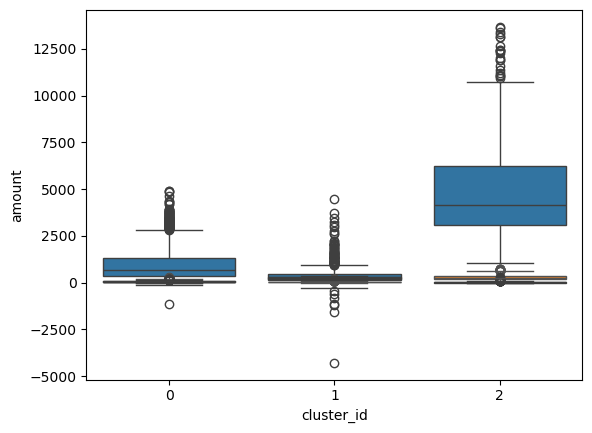

In [74]:
sns.boxplot(x='cluster_id',y='amount',data=grouped_df)
sns.boxplot(x='cluster_id',y='frequency',data=grouped_df)
sns.boxplot(x='cluster_id',y='recency',data=grouped_df)

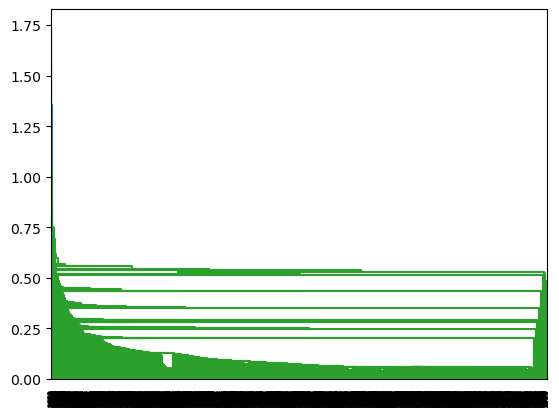

In [78]:
# heirarchical clustering 
# single linkage 
mergings=linkage(rfm_df_scaled,method="single",metric='euclidean')
dendrogram(mergings)
plt.show()

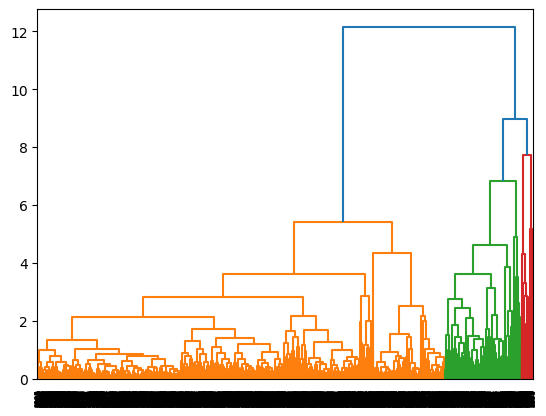

In [79]:
# complete linkage 
mergings=linkage(rfm_df_scaled,method="complete",metric='euclidean')
dendrogram(mergings)
plt.show()

In [82]:
# cut tree 
cluster_labels=cut_tree(mergings,n_clusters=3).reshape(-1,)   # we changed from shape to reshape 
cluster_labels

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [84]:
grouped_df['cluster_labels']=cluster_labels
grouped_df.head()   # cluster_id = k means , cluster_labels = heirarchical clustering 

,CustomerID,amount,frequency,recency,cluster_id,cluster_labels
0,12346.0,0.00,2,325,1,0
1,12347.0,4310.00,182,1,2,1
2,12348.0,1797.24,31,74,0,0
3,12349.0,1757.55,73,18,0,0
4,12350.0,334.40,17,309,1,0


<Axes: xlabel='cluster_labels', ylabel='amount'>

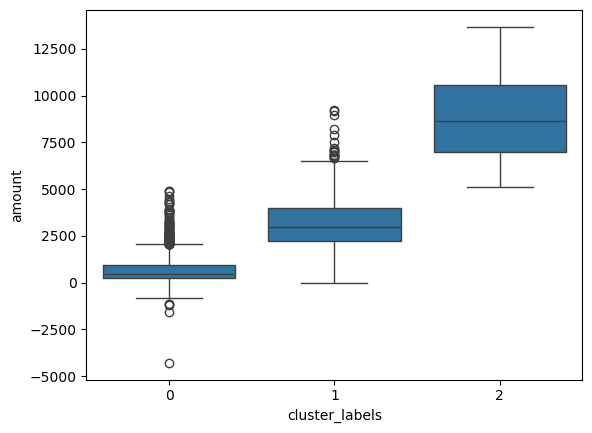

In [85]:
sns.boxplot(x='cluster_labels',y='amount',data=grouped_df)